In [1]:
import numpy as np

In [2]:
a = np.random.rand(10,3)
print(a)
print(a.reshape(1,30)[0,abs(a-0.5).argmin(axis = 1) + np.arange(10)*3])

[[0.62731059 0.35544864 0.36618854]
 [0.48460993 0.82629307 0.66121072]
 [0.6422156  0.72420565 0.63730552]
 [0.5089285  0.61682245 0.41344705]
 [0.75814182 0.48605766 0.70059113]
 [0.22377912 0.56286246 0.45175616]
 [0.90440381 0.49561249 0.10158705]
 [0.67420296 0.76513515 0.60338448]
 [0.15241042 0.44097299 0.58012982]
 [0.50638532 0.19232961 0.94422559]]
[0.62731059 0.48460993 0.63730552 0.5089285  0.48605766 0.45175616
 0.49561249 0.60338448 0.44097299 0.50638532]


In [3]:
b = np.random.rand(6,6)
b.sum(axis=0)/b.min(axis=1)

array([10712.14508309,    89.34177489,    16.75537362,    20.34245252,
         304.94334016,   103.45372778])

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
x[(x==0)[np.concatenate(((np.arange(8)+1), [False]))]].max()

7

In [5]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
a = np.zeros(80)
a[i + np.arange(8)*10] = 1
x + a.reshape(8,10).sum(axis = 0)

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

In [6]:
a = np.arange(16).reshape(4, 4)
row, col = np.indices((4,4))
dictionary = {i: a[row + col == i] for i in range (7)}
dictionary

{0: array([0]),
 1: array([1, 4]),
 2: array([2, 5, 8]),
 3: array([ 3,  6,  9, 12]),
 4: array([ 7, 10, 13]),
 5: array([11, 14]),
 6: array([15])}

Количество центров: 5
Количество точек: 400
Искажение: 13.991488985816506


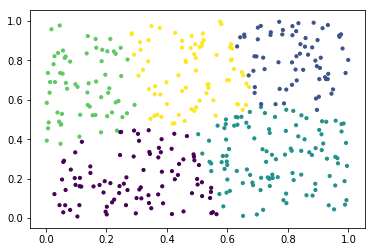

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def k_means(obs, k):
    centr = np.random.rand(k,2)
    l = []
    labels = np.argmin(np.linalg.norm(obs - centr[:, None], axis=2), axis=0)
    while not(np.array_equal(l,labels)):
        l = labels
        for i in range(k):
            centr[i] = np.mean(obs[labels == i], axis = 0)
        labels = np.argmin(np.linalg.norm(obs - centr[:, None], axis=2), axis=0)
    dist = 0
    for i in range(k):
        dist += sum(pow(obs[labels == i] - centr[i],2)).sum()
    return(l,dist)
def main():
    centr_quant = int(input("Количество центров: "))
    point_quant = int(input("Количество точек: "))
    obs = np.random.rand(point_quant, 2)
    [codebook, distortion] = k_means(obs,centr_quant)
    print("Искажение:",distortion)
    plt.scatter(*obs.T, c = codebook, s = 10)
    plt.show()
main()